In [5]:
from matplotlib.pylab import plt
import numpy as np
import pickle
from PIL import Image
import cv2
import scipy
import scipy.fftpack
from numpy import r_


In [2]:
img=plt.imread("sample_1920×1280.bmp")
yuv = cv2.cvtColor(img, cv2.COLOR_RGB2YCrCb)

In [3]:
def dct2(a):
    return scipy.fftpack.dct( scipy.fftpack.dct( a, axis=0, norm='ortho' ), axis=1, norm='ortho' )
def idct2(a):
    return scipy.fftpack.idct( scipy.fftpack.idct( a, axis=0 , norm='ortho'), axis=1 , norm='ortho')

In [32]:
imsize = img.shape
dct = np.zeros(imsize)

for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        dct[i:(i+8),j:(j+8)] = dct2( yuv[i:(i+8),j:(j+8)] )

print(dct)

[[[ 1.15412500e+03  1.20000000e+03  1.00950000e+03]
  [ 1.21260133e+01  0.00000000e+00 -1.54685631e+00]
  [-3.31764240e+00  0.00000000e+00  4.61939766e-01]
  ...
  [-1.00635976e-01  4.84485399e-01  5.15872356e-02]
  [ 1.55896528e-02 -1.10093967e-01  4.50520098e-15]
  [-1.90853177e-01  1.41369331e+00  1.48565319e+00]]

 [[-3.79483157e+00  0.00000000e+00 -1.54685631e+00]
  [-2.74585509e-02  0.00000000e+00  1.50126108e+00]
  [-3.48837406e+00  0.00000000e+00 -2.45196320e-01]
  ...
  [ 2.43169322e-01 -5.14641213e-01  2.72447553e-01]
  [-1.99165370e-01 -9.99960016e-01 -1.43632679e-01]
  [-2.62932495e-01 -2.53941266e-01  2.30969883e-01]]

 [[-6.76495125e-02  0.00000000e+00  4.61939766e-01]
  [ 4.44424334e+00  0.00000000e+00 -2.45196320e-01]
  [ 5.13648539e+00  0.00000000e+00 -4.26776695e-01]
  ...
  [-4.55864562e-01  1.28319992e-01  0.00000000e+00]
  [-8.83883476e-02  4.41941738e-01  3.53553391e-01]
  [ 2.52927392e-01  4.50599889e-02  0.00000000e+00]]

 ...

 [[-7.01926692e+00  2.14060669e-01

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, '8x8 DCTs of the image')

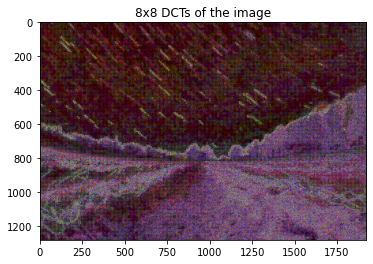

In [33]:
plt.figure()
plt.imshow(dct,cmap='gray',vmax = np.max(dct)*0.01,vmin = 0)
plt.title( "8x8 DCTs of the image")

In [34]:
im_dct = np.zeros(imsize)

for i in r_[:imsize[0]:8]:
    for j in r_[:imsize[1]:8]:
        im_dct[i:(i+8),j:(j+8)] = idct2( dct[i:(i+8),j:(j+8)] )
im_dct=im_dct*k
im_dct=im_dct-m
print(im_dct)

[[[367687.6478487  382982.9367252  321801.78121921]
  [382982.9367252  382982.9367252  321801.78121921]
  [370236.86266145 382982.9367252  321801.78121921]
  ...
  [247874.55164947 370236.86266145 342195.4997212 ]
  [258071.41090047 375335.29228695 344744.71453395]
  [270817.48496421 375335.29228695 344744.71453395]]

 [[382982.9367252  382982.9367252  321801.78121921]
  [367687.6478487  382982.9367252  321801.78121921]
  [365138.43303595 382982.9367252  321801.78121921]
  ...
  [250423.76646222 370236.86266145 342195.4997212 ]
  [255522.19608772 372786.0774742  344744.71453395]
  [260620.62571321 375335.29228695 344744.71453395]]

 [[362589.2182232  382982.9367252  321801.78121921]
  [352392.3589722  382982.9367252  321801.78121921]
  [357490.7885977  382982.9367252  321801.78121921]
  ...
  [258071.41090046 370236.86266145 342195.4997212 ]
  [260620.62571321 372786.0774742  344744.71453395]
  [260620.62571321 372786.0774742  344744.71453395]]

 ...

 [[ 20994.43331475 326900.21084471

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, '8x8 DCTs of the image')

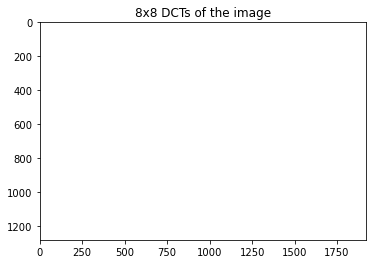

In [35]:
plt.figure()
plt.imshow(im_dct,cmap='gray')
plt.title( "8x8 DCTs of the image")